In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 864.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 90.7 MB/s eta 0:00:00
  

In [ ]:
import pycaret
import pandas as pd
from pycaret.regression import *
#warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
from sklearn import set_config
set_config(display='text')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
df = pd.read_csv('/content/OdettedataML1.csv')

In [ ]:
df

,Cu,Ni,Mn,P,C,Si,Tirr,Fluence,DeltaYS
0,0.14,0.20,1.2,0.015,0.21,0.28,290,2.000000e+17,26.00
1,0.14,0.20,1.2,0.015,0.21,0.28,290,2.300000e+17,45.00
2,0.14,0.20,1.2,0.015,0.21,0.28,290,3.000000e+17,3.00
3,0.14,0.20,1.2,0.015,0.21,0.28,290,4.000000e+17,27.00
4,0.14,0.20,1.2,0.015,0.21,0.28,290,6.000000e+17,7.00
...,...,...,...,...,...,...,...,...,...
1545,0.06,0.62,1.3,0.009,0.08,0.37,290,1.570000e+19,43.00
1546,0.06,0.62,1.3,0.009,0.08,0.37,310,1.600000e+19,58.00
1547,0.06,0.62,1.3,0.009,0.08,0.37,270,1.710000e+19,53.00
1548,0.06,0.62,1.3,0.009,0.08,0.37,290,3.320000e+19,81.00


In [ ]:
df.DeltaYS


,DeltaYS
0,26.00
1,45.00
2,3.00
3,27.00
4,7.00
...,...
1545,43.00
1546,58.00
1547,53.00
1548,81.00


In [ ]:
df1=df.drop('DeltaYS',axis=1)

In [ ]:
df_norm = (df1-df1.min())/(df1.max()-df1.min())
df_norm = pd.concat((df_norm, df.DeltaYS),axis=1)

print("Scaled Dataset Using Pandas")
df_norm.head()

Scaled Dataset Using Pandas


,Cu,Ni,Mn,P,C,Si,Tirr,Fluence,DeltaYS
0,0.162791,0.116959,0.704142,0.270833,0.617647,0.435484,0.5,0.000637,26.0
1,0.162791,0.116959,0.704142,0.270833,0.617647,0.435484,0.5,0.000773,45.0
2,0.162791,0.116959,0.704142,0.270833,0.617647,0.435484,0.5,0.001091,3.0
3,0.162791,0.116959,0.704142,0.270833,0.617647,0.435484,0.5,0.001546,27.0
4,0.162791,0.116959,0.704142,0.270833,0.617647,0.435484,0.5,0.002455,7.0


In [ ]:
# setup the dataset
grid = setup(data=df_norm, target='DeltaYS',train_size=0.8, session_id =234)

,Description,Value
0,Session id,234
1,Target,DeltaYS
2,Target type,Regression
3,Original data shape,"(1550, 9)"
4,Transformed data shape,"(1550, 9)"
5,Transformed train set shape,"(1240, 9)"
6,Transformed test set shape,"(310, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,10.6251,246.4944,15.5163,0.9541,0.4173,0.3572,0.0850
lightgbm,Light Gradient Boosting Machine,10.7353,252.3073,15.6910,0.9532,0.3861,0.3277,1.0370
gbr,Gradient Boosting Regressor,12.7121,306.6485,17.4086,0.9428,0.4382,0.4007,0.1220
rf,Random Forest Regressor,12.3622,336.4835,18.1931,0.9369,0.4029,0.3696,0.3840
et,Extra Trees Regressor,13.0752,379.1460,19.3113,0.9289,0.4341,0.4015,0.4740
dt,Decision Tree Regressor,16.1762,573.0542,23.8376,0.8920,0.5155,0.4806,0.0240
knn,K Neighbors Regressor,20.7577,991.2842,31.0021,0.8191,0.5491,0.6553,0.0260
ada,AdaBoost Regressor,27.7489,1116.1263,33.3424,0.7886,0.7969,1.5232,0.1120
ridge,Ridge Regression,34.9394,2128.6075,46.0361,0.5890,0.8025,1.3928,0.0640
br,Bayesian Ridge,34.8137,2125.7481,45.9995,0.5889,0.8009,1.3635,0.0210


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

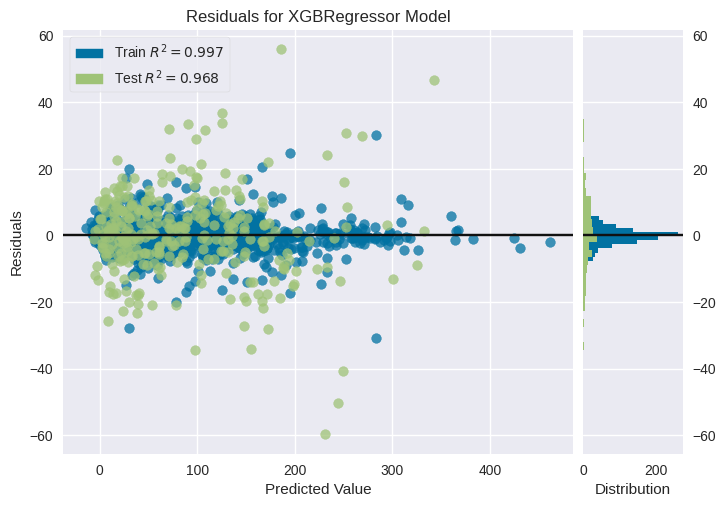

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

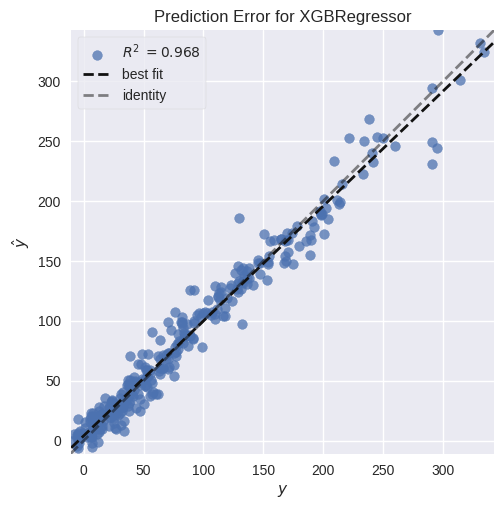

In [ ]:
# plot error
plot_model(best, plot = 'error')

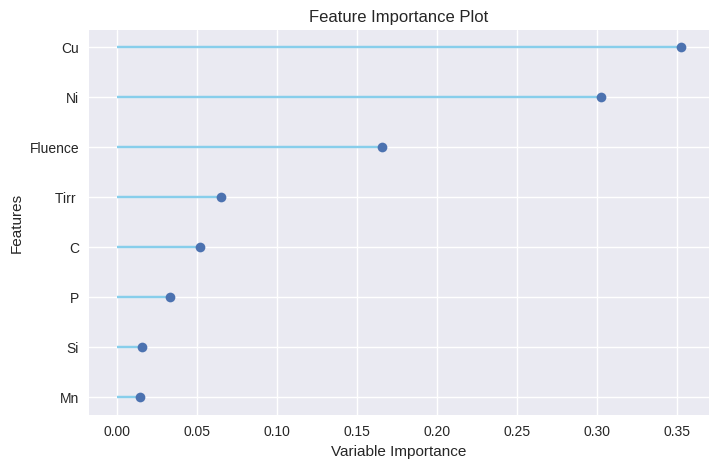

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.5993,275.5529,16.5998,0.9323,0.4695,0.3314
1,9.2588,179.7725,13.4079,0.9683,0.3376,0.2520
2,11.4022,296.7633,17.2268,0.9388,0.4858,0.4679
3,8.9851,141.7450,11.9057,0.9698,0.3774,0.2872
4,12.5715,365.0503,19.1063,0.9439,0.4562,0.3456
5,11.9591,289.1521,17.0045,0.9634,0.3024,0.2932
6,12.2357,333.0694,18.2502,0.9438,0.3589,0.2666
7,9.2289,171.0049,13.0769,0.9603,0.5125,0.4526
8,10.3406,248.2275,15.7552,0.9588,0.4126,0.4638


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgb = tune_model(xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.3595,247.6361,15.7365,0.9392,0.4324,0.3412
1,10.2922,204.8828,14.3137,0.9639,0.3426,0.2890
2,9.9879,200.1355,14.1469,0.9587,0.4414,0.3898
3,11.3062,217.8693,14.7604,0.9536,0.4866,0.3445
4,13.4123,413.4705,20.3340,0.9365,0.4209,0.3943
5,12.5547,313.9251,17.7179,0.9603,0.3871,0.3434
6,12.3398,322.0591,17.9460,0.9457,0.3961,0.3351
7,11.2519,232.3775,15.2439,0.9460,0.5150,0.5764
8,11.5469,269.9744,16.4309,0.9552,0.4338,0.3951


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(tuned_xgb)


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=234, ...)


In [ ]:
plot_model?

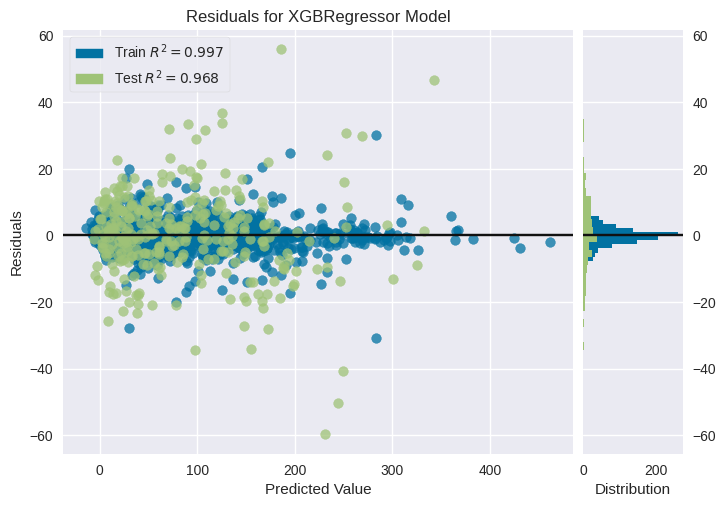

In [ ]:
plot_model(tuned_xgb)

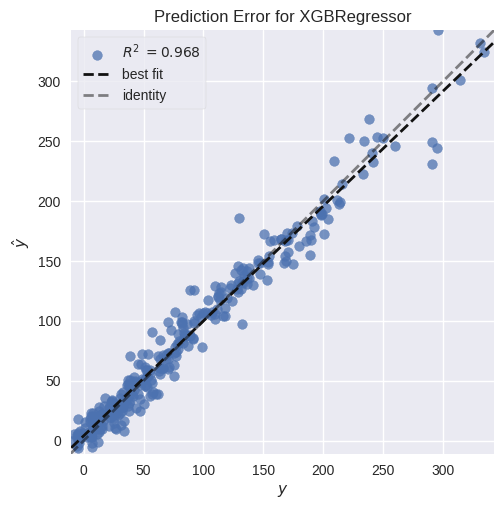

In [ ]:
plot_model(tuned_xgb, plot = 'error')

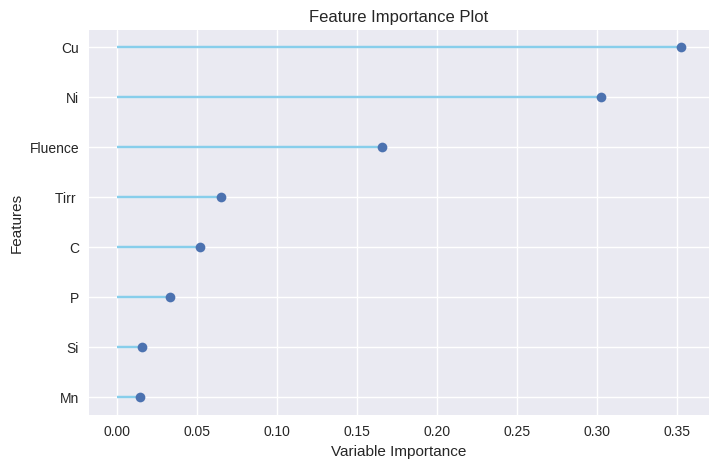

In [ ]:
plot_model(tuned_xgb, plot = 'feature')


In [ ]:
evaluate_model(tuned_xgb)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(tuned_xgb)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,9.4051,173.2294,13.1617,0.9679,0.3842,0.3888


,Cu,Ni,Mn,P,C,Si,Tirr,Fluence,DeltaYS,prediction_label
1084,0.441860,0.730994,0.810651,0.062500,0.558824,0.354839,0.75,0.077021,130.0,185.911743
1030,0.476744,0.502924,0.846154,0.062500,0.411765,0.354839,0.00,0.018369,202.0,194.516251
1123,0.000000,0.432749,0.804734,0.062500,0.470588,0.338710,0.75,0.149768,34.0,8.276490
1434,0.209302,0.356725,0.745562,0.145833,0.235294,0.790323,0.50,0.001091,24.0,32.764435
387,0.011628,0.005848,0.970414,0.812500,0.411765,0.241935,0.50,0.007911,11.0,13.691362
...,...,...,...,...,...,...,...,...,...,...
1109,0.000000,0.432749,0.804734,0.062500,0.470588,0.338710,1.00,0.017914,12.0,14.155022
654,0.023256,0.497076,0.940828,0.083333,0.382353,0.241935,0.00,0.011549,14.0,21.757938
1102,0.000000,0.432749,0.804734,0.062500,0.470588,0.338710,0.50,0.010639,21.0,19.385950
936,0.162791,0.479532,0.822485,0.354167,0.529412,0.387097,0.50,0.038374,92.0,98.110832


In [ ]:
final_xgb = finalize_model(tuned_xgb)
print(final_xgb)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Cu', 'Ni', 'Mn', 'P', 'C', 'Si',
                                             'Tirr ', 'Fluence'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames()))...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
   

In [ ]:
predict_model(final_xgb)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,3.0031,19.1056,4.3710,0.9965,0.2208,0.1428


,Cu,Ni,Mn,P,C,Si,Tirr,Fluence,DeltaYS,prediction_label
1084,0.441860,0.730994,0.810651,0.062500,0.558824,0.354839,0.75,0.077021,130.0,134.909286
1030,0.476744,0.502924,0.846154,0.062500,0.411765,0.354839,0.00,0.018369,202.0,200.479080
1123,0.000000,0.432749,0.804734,0.062500,0.470588,0.338710,0.75,0.149768,34.0,31.129639
1434,0.209302,0.356725,0.745562,0.145833,0.235294,0.790323,0.50,0.001091,24.0,27.988012
387,0.011628,0.005848,0.970414,0.812500,0.411765,0.241935,0.50,0.007911,11.0,11.902555
...,...,...,...,...,...,...,...,...,...,...
1109,0.000000,0.432749,0.804734,0.062500,0.470588,0.338710,1.00,0.017914,12.0,13.383698
654,0.023256,0.497076,0.940828,0.083333,0.382353,0.241935,0.00,0.011549,14.0,15.980114
1102,0.000000,0.432749,0.804734,0.062500,0.470588,0.338710,0.50,0.010639,21.0,19.545454
936,0.162791,0.479532,0.822485,0.354167,0.529412,0.387097,0.50,0.038374,92.0,90.290459


In [ ]:
save_model(final_xgb,'Final XGBoost Model 23April2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Cu', 'Ni', 'Mn', 'P', 'C', 'Si',
                                              'Tirr ', 'Fluence'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames()))...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_

In [ ]:
pip install shap


In [ ]:
import shap
pd.set_option('display.max_columns', None)
shap.initjs()

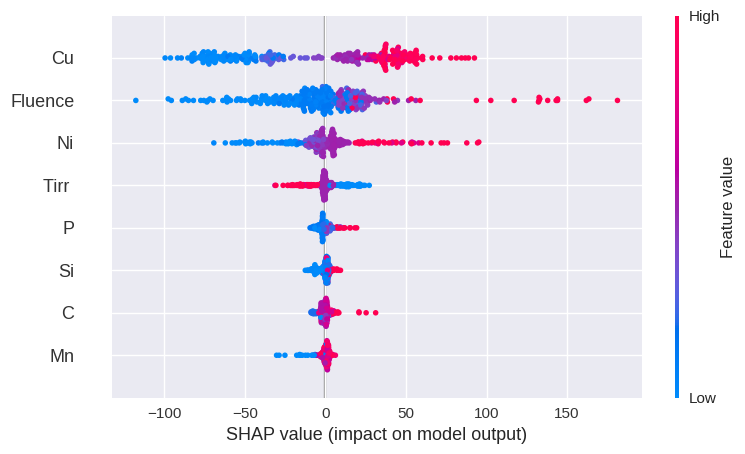

In [ ]:
interpret_model(xgb, plot = 'summary')


In [ ]:
interpret_model(xgb, plot = 'reason', observation = 1)

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/23 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['Cu', 'Ni', 'Mn',...",34.7989,2125.7764,45.9988,0.5888,0.8014,1.3588
1,Lasso Regression,"(TransformerWrapper(include=['Cu', 'Ni', 'Mn',...",36.7269,2292.6967,47.7992,0.5636,0.8487,1.6125
2,Ridge Regression,"(TransformerWrapper(include=['Cu', 'Ni', 'Mn',...",34.9394,2128.6075,46.0361,0.5890,0.8025,1.3928
3,Elastic Net,"(TransformerWrapper(include=['Cu', 'Ni', 'Mn',...",56.4846,5133.9527,71.2155,0.0560,1.1495,3.1863
4,Least Angle Regression,"(TransformerWrapper(include=['Cu', 'Ni', 'Mn',...",34.7989,2125.7764,45.9988,0.5888,0.8014,1.3588
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['Cu', 'Ni', 'Mn',...",36.7269,2292.6957,47.7992,0.5636,0.8487,1.6125
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['Cu', 'Ni', 'Mn',...",49.0992,4303.1636,65.2657,0.2019,0.9626,2.0227
7,Bayesian Ridge,"(TransformerWrapper(include=['Cu', 'Ni', 'Mn',...",34.8137,2125.7481,45.9995,0.5889,0.8009,1.3635
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['Cu', 'Ni', 'Mn',...",33.8717,2269.2024,47.4099,0.5570,0.7267,1.1118


In [ ]:
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Cu', 'Ni', 'Mn', 'P', 'C', 'Si',
                                             'Tirr ', 'Fluence'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames()))...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
   

In [ ]:
# find best model based on CV metrics
automl()

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=234, ...)